# SONIC model - validation of NEURON implementation for "point" simulations

## NEURON implementation
1 MOD file per neuron type, containing the following:
- **NEURON** block: defines intrinsic currents as "non-specific" (to avoid dealing with ion concentrations) and declares RANGE variables that must be accessible 
- **PARAMETER** block: sets membrane properties (conductances and reversal potentials), and sets 2 parameters: $stimon$ (controlling the stimulation state) and $A_{drive}$ (acoustic amplitude)
- **STATE** block: declares differential variables other than $v$, i.e. ion channel gating states (and possibly intermediate regulating factors)
- **ASSIGNED** block: declares variable to track during simulation: $v$, $V_{m, eff}$ and ionic currents other evolving variables
- a set of **FUNCTION_TABLE**s to perform 2D interpolation of $V_{m, eff}$ and rate constants in the (amplitude x charge)  space
- **INITIAL** block: defines initial values of states
- **BREAKPOINT** block: main computational block, solving states and computing currents
- **DERIVATIVE** block: defines differential equations for states

FUNCTION_TABLEs are dynamically loaded from Python objects (no need to write on disk).

## Similarities and differences
|                                                  | Python                             |  Python+NEURON          |
| :----------------------------------------------: | :--------------------------------: | :---------------------: |
| ODE solver                                       | LSODA (Adams method)               | Crank-Nicholson (cnexp) |
| Time step                                        | Fixed (0.05 ms)                    | Adaptive                |
| Integration of US-ON periods                     | Interpolation tables               | Interpolation tables    |
| Integration of US-OFF periods                    | Standard equations                 | Interpolation tables    |
| Computation of membrane deflection / capacitance | Solving $P_M + P_G +P_Q - P_0 = 0$ | None                    |
| Computation of gas content evolution             | Interpolation table                | None                    |

### Imports
Let's import the necessary packages and modules

In [1]:
%matplotlib inline

import logging
import numpy as np
import matplotlib.pyplot as plt

from PySONIC.utils import logger, getNeuronsDict, si_format
from PySONIC.neurons import *
from run_utils import compare0D

logger.setLevel(logging.INFO)

### Parameters
Let's set some default model and stimulation parameters.

Note that since we're trying to model the behavior of multiple "sonophore" nodes connected in series, **the default node length of the model is set to the in-plane diameter of a typical sonophore structure**.

In [2]:
# Model parameters
neuron = CorticalRS()
a = 32e-9  # sonophore diameter

# Stimulation parameters
Fdrive = 500e3  # Hz
Adrive = 50e3  # kPa
tstim = 150e-3  # s
toffset = 100e-3  # s
PRF = 100.  # Hz
DC = 1.

## Validation 

### Different neuron types in default conditions

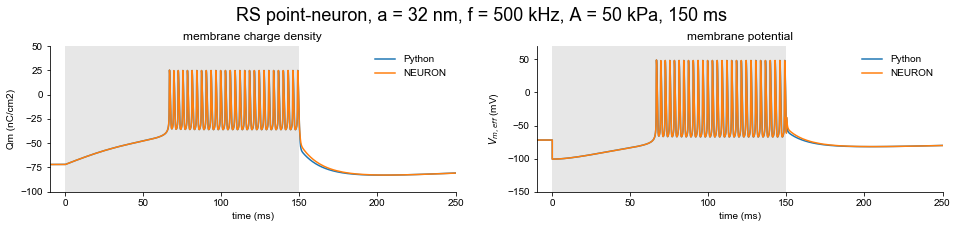

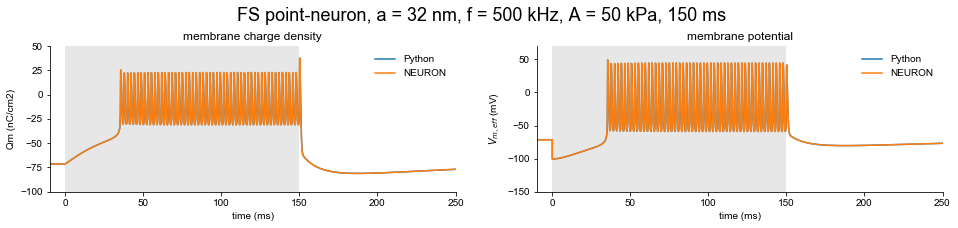

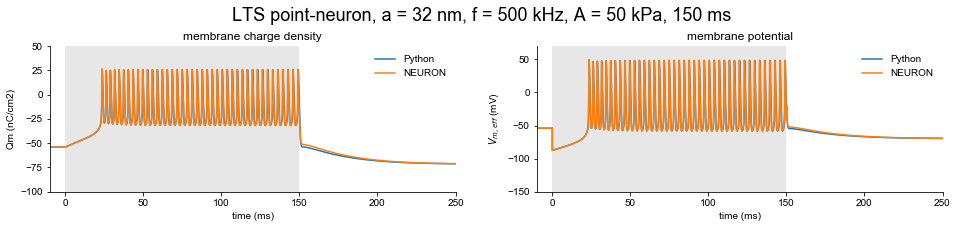

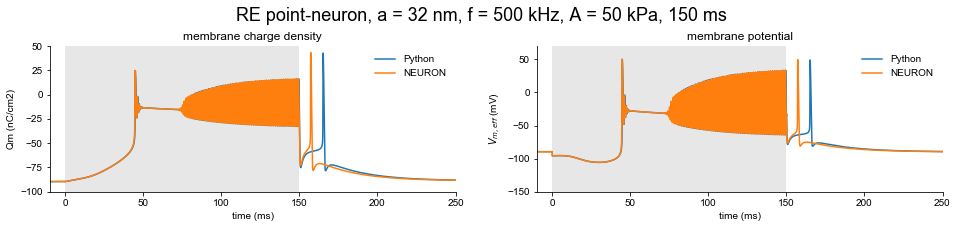

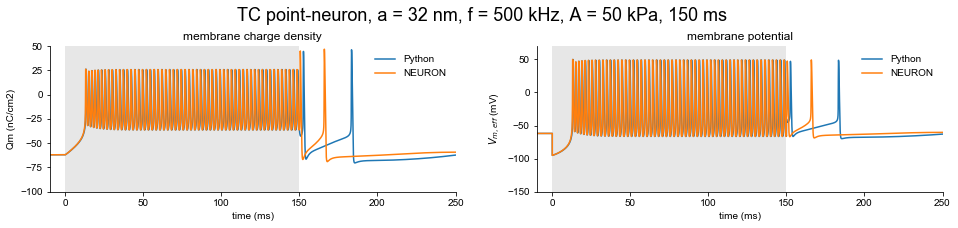

In [3]:
for neuron_str in ['RS', 'FS', 'LTS', 'RE', 'TC']:
    fig = compare0D(getNeuronsDict()[neuron_str](), a, Fdrive, Adrive, tstim, toffset, PRF, DC)

### Sensitivity to stimulus frequency

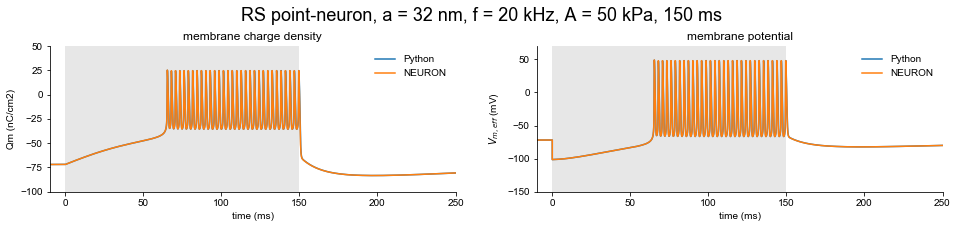

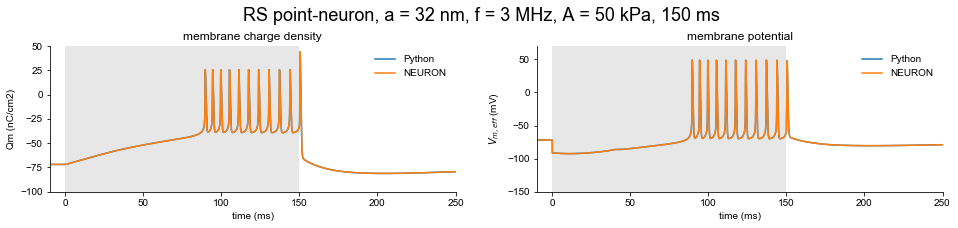

In [4]:
for Fdrive_range in np.logspace(np.log10(20e3), np.log10(3e6), 2):
    fig = compare0D(neuron, a, Fdrive_range, Adrive, tstim, toffset, PRF, DC)

### Sensitivity to stimulus amplitude

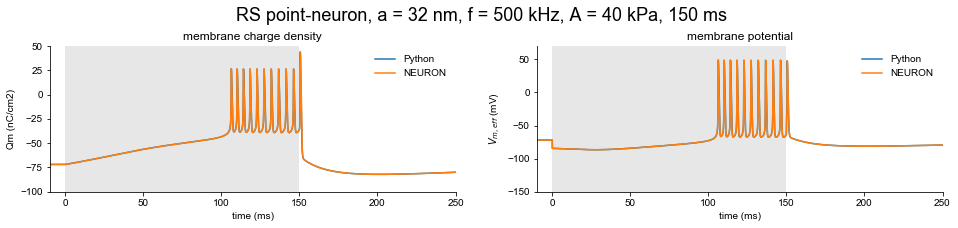

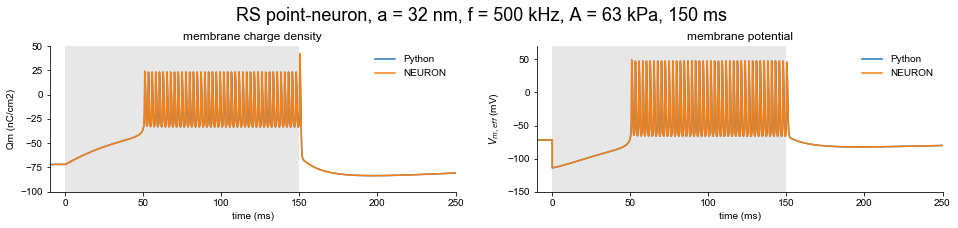

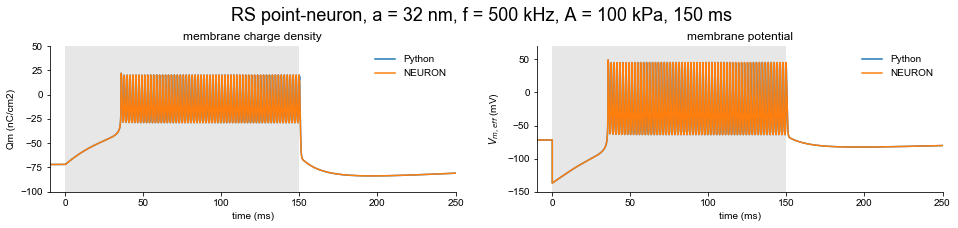

In [5]:
for Adrive_range in np.logspace(np.log10(40e3), np.log10(100e3), 3):
    fig = compare0D(neuron, a, Fdrive, Adrive_range, tstim, toffset, PRF, DC)

### Sensitivity to duty cycle

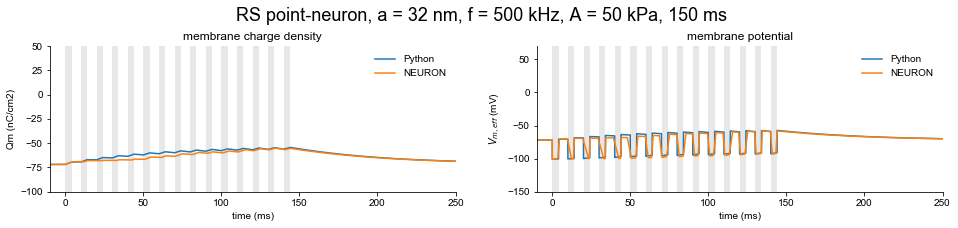

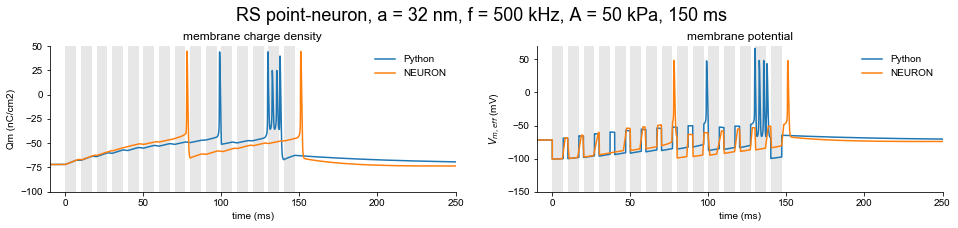

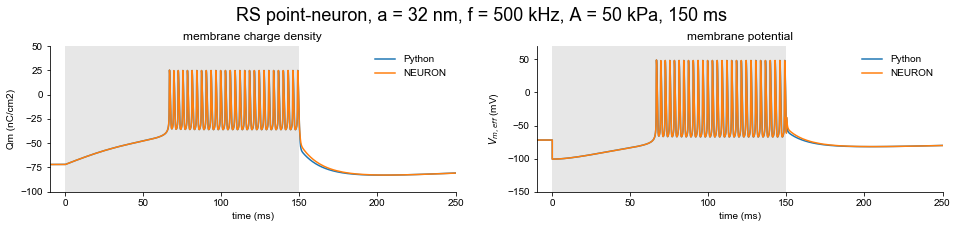

In [6]:
for DC_range in np.linspace(0.4, 1, 3):
    fig = compare0D(neuron, a, Fdrive, Adrive, tstim, toffset, PRF, DC_range)

## Acceleration quantification

--> TODO